In [120]:
#TCP SYN attack model

In [121]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("./revised_kddcup_dataset.csv",index_col=0)

In [123]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [124]:
tcp_syn_df = df[df.loc[:,"protocol_type"] == "tcp"]

In [125]:
tcp_syn_df = tcp_syn_df[tcp_syn_df.loc[:,"srv_serror_rate"] > 0.7]

In [126]:
tcp_syn_df.to_csv("tcp_sync_attack.csv")

In [127]:
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,X11,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,X11,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,finger,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [128]:
service_values = np.unique(tcp_syn_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    tcp_syn_df = tcp_syn_df.replace(service_values[i], (i-mid)/10)

In [129]:
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [130]:
features = ["service","src_bytes","wrong_fragment","count","num_compromised","srv_count","srv_serror_rate","serror_rate"]
target = "result"

In [131]:
X = tcp_syn_df.loc[:,features]
y =tcp_syn_df.loc[:,target]




In [132]:
classes = np.unique(y)
print(classes)

['apache2.' 'guess_passwd.' 'land.' 'mscan.' 'neptune.' 'nmap.' 'normal.'
 'processtable.' 'saint.' 'satan.' 'warezmaster.' 'xsnoop.']


In [133]:
#заменяем все классы атаки на 1 и нормальный результат на 0
for i in range(len(classes)):
    if i == 2:
        tcp_syn_df = tcp_syn_df.replace(classes[i], 0)
    else:
        tcp_syn_df = tcp_syn_df.replace(classes[i], 1)

#turning the service attribute to categorical values
tcp_syn_df=tcp_syn_df.replace("eco_i",-0.1)
tcp_syn_df=tcp_syn_df.replace("ecr_i",0.0)
tcp_syn_df=tcp_syn_df.replace("tim_i",0.1)
tcp_syn_df=tcp_syn_df.replace("urp_i",0.2)

In [134]:
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,1
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,1
34836,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,1
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,1
34864,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,1


In [135]:
y =tcp_syn_df.loc[:,target]

[]

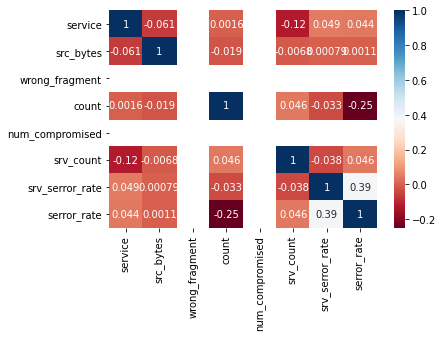

In [136]:
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

service            0.559919
count              0.289778
srv_count          0.127445
src_bytes          0.021834
serror_rate        0.001014
srv_serror_rate    0.000011
wrong_fragment     0.000000
num_compromised    0.000000
dtype: float64


In [139]:
X = X.loc[:,["service","count","srv_count","src_bytes","serror_rate"]]
for i in X.index:
    if y[i] == 0:
        print(i,":",X.loc[i,:])

136558 : service       -1.5
count          1.0
srv_count      1.0
src_bytes      0.0
serror_rate    1.0
Name: 136558, dtype: float64
136559 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136559, dtype: float64
136560 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136560, dtype: float64
136561 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136561, dtype: float64
136562 : service       -1.5
count          1.0
srv_count      3.0
src_bytes      0.0
serror_rate    1.0
Name: 136562, dtype: float64
136563 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136563, dtype: float64
136564 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136564, dtype: float64
136565 : service       -1.5
count          1.0
srv_count      2.0
src

In [140]:
print(list(X.loc[136565 ,:]))
print(y[136565 ])

[-1.5, 1.0, 2.0, 0.0, 1.0]
0


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [143]:
models = [ KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
classifiers = ["KNN","ID3"]
scores = []

In [144]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of the model is:  99.98171512159443
Confusion Matrix:
 [[   2    1]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       1.00      0.83      0.90      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============
Accuracy of the model is:  100.0
Confusion Matrix:
 [[   3    0]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       1.00      1.00      1.00      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============


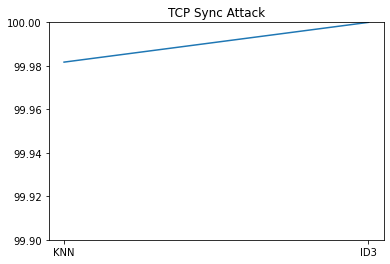

In [145]:
plt.plot(classifiers,scores)
plt.title("TCP Sync Attack")
plt.ylim(99.9,100)
plt.show()